In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 2
$$W_s = 0.33$$
$$W_a = 0.33$$
$$W_u = 0.33$$

In [3]:
exp_s = 'exp2(0.33,0.33,0.33)'

In [4]:
containers_data = {}
with open(f"./{exp_s}/containers.json") as file:
    for line in file:
        data = json.loads(line)
        cycle = data['cycle']
        insertion = {
            'nb_containers': data['nb_containers'], 
            'date' : data['date']['$date'],
            'cpu_util' : 0
        }
        for key,value in data.items():
            if key.startswith('economicmape_web_'):
                insertion['cpu_util'] += value['cpu_percent']
        containers_data[cycle] = insertion
containers = pd.DataFrame(containers_data).T

In [5]:
planning_data = {}
with open(f"./{exp_s}/planning.json") as file:
     for line in file:
            data = json.loads(line)
            cycle = data['cycle']
            data.pop('_id')
            data['date'] = data['date']['$date']
            planning_data[cycle] = data
planning = pd.DataFrame(planning_data).T

In [6]:
execution_data = {}
with open(f"./{exp_s}/execution.json") as file:
     for line in file:
            data = json.loads(line)
            cycle = data['cycle']
            data.pop('_id')
            data['date'] = data['date']['$date']
            execution_data[cycle] = data
execution = pd.DataFrame(execution_data).T

In [7]:
planning.set_index('cycle',inplace=True)
execution.set_index('cycle',inplace=True)

In [8]:
planning.sort_values('cycle',inplace=True)
execution.sort_values('cycle',inplace=True)

In [9]:
execution = execution[~execution.index.duplicated(keep='first')]
planning['replicas']  =  execution['replicas']
planning['nb_containers'] = containers['nb_containers']
planning['cpu_util'] = containers['cpu_util']

In [10]:
exp1 = planning
exp1 = exp1.iloc[1:]

In [11]:

exp1['replicas'].unique()

array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 100, 85, 64, 70, 62, 76, 74, 88, 50, 53, 79, 67, 46,
       61, 99, 66, 73, 90, 78, 59, 71, 84, 82, 48, 75, 92, 89, 93, 86, 58,
       87, 80, 44, 68, 47, 41, 72, 42, 94, 77, 65, 98], dtype=object)

In [12]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date,replicas,nb_containers,cpu_util
cycle,,,,,,,,,,,,
2,1000,100,4060.85,24.625,158,0.00205397,240.264,4.08791,2021-05-14T17:09:59.166Z,3,3,2.453
3,400,50,7004.15,7.139,158,0.00176254,343.943,4.08002,2021-05-14T17:11:08.591Z,4,4,3.85197
4,300,30,6113.96,4.907,158,0.00184964,317.617,3.8036,2021-05-14T17:12:20.195Z,5,5,4.91295
5,160,20,4542.23,4.403,158,0.00205475,246.072,4.02296,2021-05-14T17:13:33.616Z,6,6,5.9456
6,100,10,3947.42,2.533,158,0.00202209,237.149,4.28009,2021-05-14T17:14:49.135Z,7,7,6.26921
...,...,...,...,...,...,...,...,...,...,...,...,...
747,160,20,4312.32,4.638,158,0.00208009,313.962,4.38957,2021-05-17T07:14:46.639Z,100,100,61.9858
748,100,10,2833.99,3.529,158,0.00180351,180.319,4.2088,2021-05-17T07:20:01.910Z,100,100,57.3925
749,100,20,4265.48,4.689,158,0.00208009,310.552,4.38957,2021-05-17T07:25:32.585Z,100,100,58.9989


In [13]:
exp1['W'] = exp1['predicted_W']
exp1.fillna(method='ffill',inplace=True)

<ipython-input-13-9b65033746fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['W'] = exp1['predicted_W']
/home/nima/.local/lib/python3.8/site-packages/pandas/core/frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Number of containers

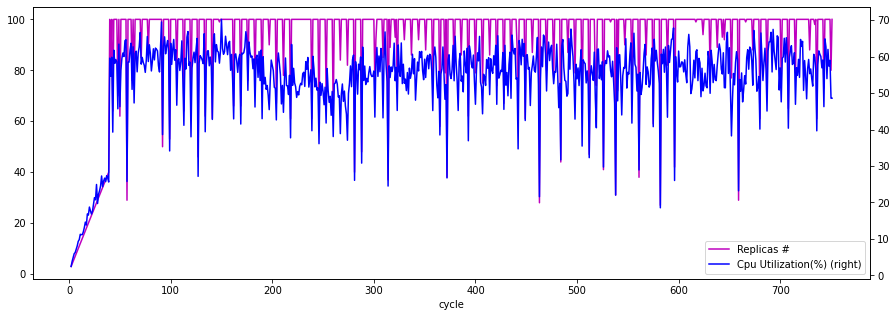

In [14]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['replicas'].plot(legend=True,label='Replicas #',color='m')
exp1['cpu_util'].plot(legend=True,label='Cpu Utilization(%)',secondary_y=True,color='b')
plt.xlabel('Cycle Number')
plt.savefig(f'{exp_s}/replicas_number.png')

## Response time vs. Arrival rate

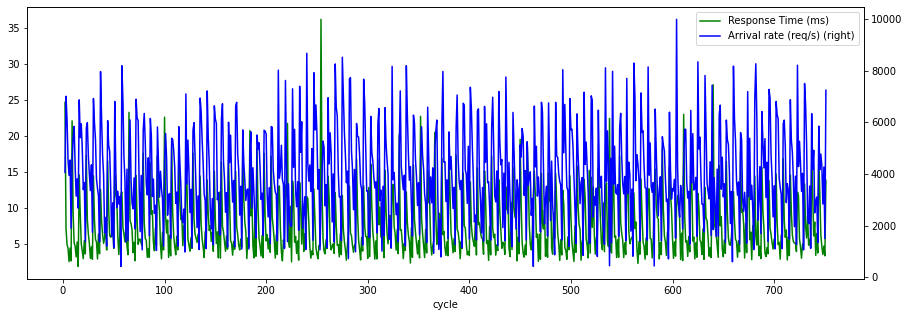

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
# ax.set_ylim(0,5000)
# ax.right_ax.set_ylim([0,150])

plt.savefig(f'{exp_s}/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

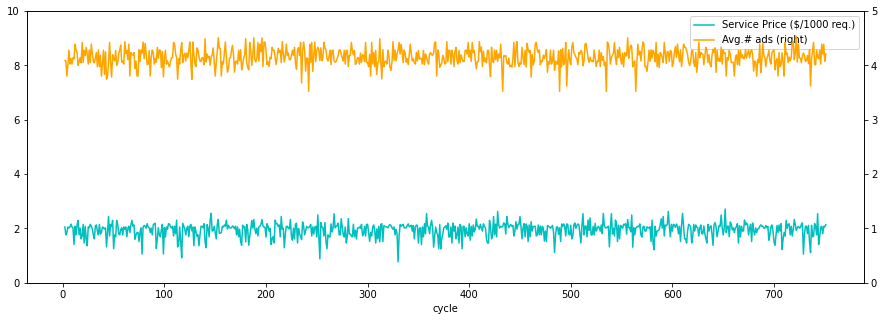

In [21]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig(f'{exp_s}/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [22]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

<ipython-input-22-634cab59c365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
<ipython-input-22-634cab59c365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
<ipython-input-22-634cab59c365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

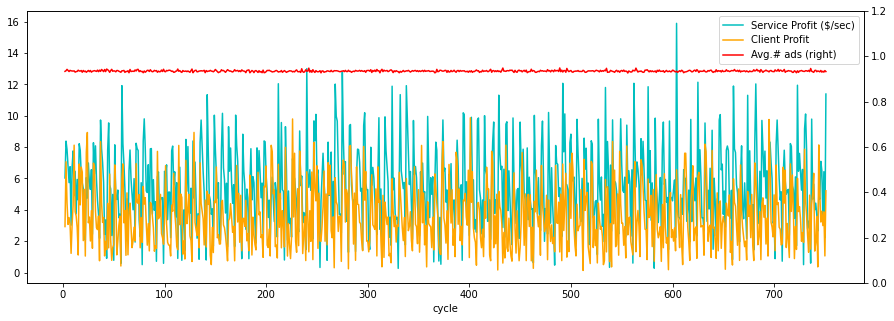

In [23]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
# ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig(f'{exp_s}/service_profit_vs_client_profit_user_satisfaction.png')